To support the 2020 MSOM Data Driven Research Challenge dataset provided by JD.com, this document provides a simple illustrative example on what is in the data and how to connect the data between varies tables to make effective analysis. The notebook can be used as a reference to help understanding the dataset. It is als runnable using the dataset for data exploration as a Jupyter notebook.
For more detailed description of the data, data schema and underlying business scenario, please refer to the main document.

# Prerequirements
- To run the notebook, please make sure you have ___Python___ and ___Jupyter___ (https://jupyter.org/) installed and started.
- Please make sure the dataset files are in the same folder as the notebook file.
- You also need ___pandas___ (https://pandas.pydata.org/) and ___numpy___ (https://www.numpy.org/) library packages installed.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# Data Description

- The data sets provided by JD.com offer a detailed view on the activities associated with 31,868 SKUs within one anonymized consumable category during the month of March in 2018.

- Each SKU can be identified either as “first party owned” (1P) or “third-partyowned” (3P)
- 1P SKUs are managed by JD.com, including product assortments, inventory replenishments, product pricing, order deliveries, and after-sales customer services. 
- They compete on the JD.com platform for sales through different pricing strategies and marketing activities.

# Load and View Data

- Loading all 7 data tables

In [2]:
# 'skus' table
skus = pd.read_csv('../Data/JD_sku_data.csv')
# 'users' table
users = pd.read_csv('../Data/JD_user_data.csv')
# 'clicks' table
clicks = pd.read_csv('../Data/JD_click_data.csv')
# 'orders' table
orders = pd.read_csv('../Data/JD_order_data.csv')
# 'delivery' table
delivery = pd.read_csv('../Data/JD_delivery_data.csv')
# 'inventory' table
inventory = pd.read_csv('../Data/JD_inventory_data.csv')
# 'network' table
network = pd.read_csv('../Data/JD_network_data.csv')

### ___skus___ table

In [3]:
skus.head()

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3.0,60.0,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2.0,50.0,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3.0,70.0,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3.0,70.0,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN


| Field           | Data type | Description      | Sample Value | Range             |
|-----------------|-----------|------------------|--------------|-------------------|
| sku_ID          | string    | unique ID        | b4859434f    | NaN               |
| type            | int       | 1P or 3P         | 1            | 1 or 2            |
| brand_ID        | string    | unique brand ID  | c392432fdjso | NaN               |
| attribute1      | int       | attribute1       | 3            | 1 - 4             |
| attribute2      | int       | attribute2       | 60           | 30 - 100          |
| activate_date   | string    | first introduced | 2018-03-01   | start - end March |
| deactivate_date | string    | terminated       | 2018-03-01   | "                 |

- 1,167 of them are 1P SKUs (type value = 1)
- 30,701 of them are 3P SKUs (type value = 2)
- However, only 9,159 SKUs out of 32,343 were involved in purchase activities during March of 2018. 
- For each attribute, a higher value indicates better performance 
- many SKUs have missing values for attributes
- activate_date and deactivate_date: the data set only lists a valid activate_date and deactivate_date when one of these dates occurred within the month of March in 2018. 
- 1,141 SKUs were deactivated and 3,058 SKUs were activated during March, and their monthly sales account for 2% and 5% of the total monthly sales, respectively

### ___user___ table

In [4]:
users.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


|             Field | Data Type |                                              Description | sample value |                                                                                          value range |
|:------------------|:----------|:---------------------------------------------------------|:-------------|:-----------------------------------------------------------------------------------------------------|
|           user_ID |    string |                                                 uniqueID |  302582dnfsf |                                                                                                  NaN |
|        user_level |       int | higher user level = more money they've spent on the site |           10 |                                                                                         0-4 , 10, -1 |
| first_order_month |    string |           month when customer placed first order with JD |      2017-07 |                                                                                                      |
|              plus |       int |                        if user is with a plus membership |            0 |                                                                                               0 or 1 |
|            gender |    string |                                  user gender (estimated) |            F |                                                                                            F , M , U |
|               age |    string |                               user age range (estimated) |        26-35 |                                                   <=15, 16-25, 26-35, 36-45, 46-55, >=56, U: unknown |
|    marital_status |    string |                          user marital status (estimated) |            M |                                                                     M: Married, S: Single, U:Unknown |
|         education |       int |                         user education level (estimated) |            3 | 1: less than high school, 2: high school, 3: Bachelor’s degree, 4: post-graduate degree, −1: unknown |
|    purchase_power |       int |                                                estimated |            2 |                                                        1 - 5,  1 being the highest; −1 no estimation |
|        city_level |       int |                               city level of user address |            1 |                                                                                               1 - 5  |

- 2.5 million users
- 457,298 users who purchased at least one SKUs during March of 2018.
- The field first_order_month specifies the month when the user made their “first purchase” on JD.com. 
- user_level takes on a value of 0-4, higher user_level = higher total purchase value in the past. 
- enterprise users value of 10. 
- first-time purchasers, user_level value −1.
- JD PLUS membership costs up to USD45 per year and members enjoy a variety of perquisites including exclusive discounts, higher purchasing reward rate, free delivery, and return with no pre-conditions. 
- About 18% of those 458,269 customers in the data set are JD PLUS members.
- level 1 highly industrialized cities such as Beijing; level 2 cities correspond to provincial capitals; level 3 to 5 cities are smaller cities; if there are no data then the value is −1

### ___clicks___ table

In [5]:
clicks.head()

,sku_ID,user_ID,request_time,channel
0,a234e08c57,4c3d6d10c2,2018-03-01 23:57:53,wechat
1,6449e1fd87,-,2018-03-01 16:13:48,wechat
2,09b70fcd83,2791ec4485,2018-03-01 22:10:51,wechat
3,09b70fcd83,eb0718c1c9,2018-03-01 16:34:08,wechat
4,09b70fcd83,59f84cf342,2018-03-01 22:20:35,wechat


- request time are when they clicked on the SKU detail page, tells them details about the product, and it must be purchased through this page
- channel: pc, mobile, app, wechat, others

### ___orders___ table

In [6]:
orders.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


| Field                      | Data type | Description            |
|:----------------------------|:-----------|:------------------------|
| orderID                    | string    |                        |
| userID                     | string    |                        |
| skuIS                      | string    |                        |
| order_date                 | string    | yyyy-mm-dd             |
| order_time                 | string    | yyyy-mm-dd HH:MM:SS    |
| quantity                   | int       | #units ordered         |
| type                       | int       | 1P or 3P               |
| promise                    | int       | expected delivery days |
| original_unit_price        | float     |                        |
| final_unti_price           | float     |                        |
| direct_discount_per_unit   | float     |                        |
| quantity_discount_per_unit | float     |                        |
| bundle_discount_per_unit   | float     |                        |
| coupon_discount_per_unit   | float     |                        |
| gift_item | int | gift or not |
| dc_ori | int | distribution center ID originate |
| dc_des | int | distribution center ID destination |


- 486,928 unique customer orders
- If a customer ordered multiple SKUs, then the same order_ID will appear in multiple rows of SKUs
- When promise = 1, this refers to the standard same- and next-day delivery promise: Orders placed before 11am will be delivered on the same day, and orders placed before 11pm will be delivered before 3pm on the following day. When promise is x (x > 1), this indicates that the delivery will arrive at day t + x, where t is the day the order is placed. We note that promise information is not available for a small fraction of 1P orders and for most of the 3P orders
-  district = warehouse ID that covers that district. dc_ori = the warehouse the package is from. dc_des = warehouse nearest to the customer

#### Promotions

The “gap” between the original price and the final price represents the coupons and discounts
associated with different promotional activities for each SKU. There are four common types of
promotional discounts on the JD.com platform: (1) SKU direct discount, (2) group promotion,
(3) bundle promotion, and (4) gift items.
These four types of discounts can be described asfollows:


- (1) The seller of an SKU may offer a price cut in terms of a direct discount. This discount reflects the reduction in the list price as stated on the product detail page.
- (2) The seller of an SKU may offer a quantity discount to entice the customer to buy more. This quantity discount promotion can take different forms including “get an RMB 100 discount if buying over RMB 199” or “buy 3 and get 1 free.” We note that the quantity discount promotion is usually on the order level and we apply a simple allocation rule to calculate the contribution provided by each SKU in the order.
- (3) The seller may offer a bundle_discount if a customer buys a “pre-specified bundle” of SKUs within an order.
- (4) The seller may offer an SKU as a “free gift” (gift_item value = 1) if the customer purchases a “pre-specified set” of SKUs (e.g., get a free eraser if you buy x pencils and y pads of paper). The final_unit_price for each gift item is always equal to 0.


Coupons can also be applied to the order after all other promotions are applied. In contrast to the
four aforementioned promotion activities where discounts will be applied automatically once
certain criteria are met, customers need to “clip” (or claim) a coupon before making a
purchase. The field coupon_discount records the coupon promotional value associated with an
order. Similar to quantity discount as explained earlier, the discount value of the coupon is
allocated between items in the same order using an allocation rule when necessary.


We note that, for each entry in the orders table, the gap between original_unit_price and
final_unit_price should always equal the sum of direct_discount, group_discount,
bundle_discount, and coupon_discount. 

### ___delivery___ table

In [7]:
delivery.head()

,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,50d11a586d,50d11a586d,1,2018-03-01 10:00:00,2018-03-01 16:00:00,2018-03-01 19:00:00
4,a3bfe38bf4,a3bfe38bf4,1,2018-03-01 11:00:00,2018-03-01 16:00:00,2018-03-01 17:00:00


In [8]:
delivery.shape

(293229, 6)

| Field            | Data type | Description                          |
|:------------------|:-----------|:--------------------------------------|
| package_ID       | string    | uniqueID                             |
| order_ID         | string    | orderID                              |
| type             | int       | 1P or 3P                             |
| ship_out_time    | string    | yyyy-mm-dd HH:MM:SS                  |
| arr_station_time | string    | arrival dc_des yyyy-mm-dd HH:MM:SS   |
| arr_time         | string    | arrival customer yyyy-mm-dd HH:MM:SS |

- package_ID = order_ID if the package contains all SKUs in the order
- order_ID and possibly multiple shipping packages (therefore different packageIDs) in the event that an order is split into multiple delivery packages if an order involves in-stock and on-order items.
- 293,229 packages delivered by JD Logistics
- 244,333 orders involve 1P SKUs
- 48,896 orders involve 3P SKUs

### ___inventory___ table

In [9]:
inventory.head()

,dc_ID,sku_ID,date
0,9,50f6f91962,2018-03-01
1,9,7f0ddbcdde,2018-03-01
2,9,8ad5789d74,2018-03-01
3,9,468d34eda4,2018-03-01
4,9,460afaddb6,2018-03-01


- availability of each SKU at each warehouse. 
- inventory at the end of the day 

### ___network___ table

In [10]:
network.head()

,region_ID,dc_ID
0,2,57
1,2,43
2,2,42
3,2,66
4,2,20


- different warehouses located in different districts (dc_ID) to different geographical regions (region_ID). 
- one of the 17 warehouses will be designated as the “central warehouse” for that region. “back-up fulfillment” option when other (typically smaller) warehouses in the region run out of inventory for their corresponding districts. 
- central warehouse dc_ID = region_ID. 

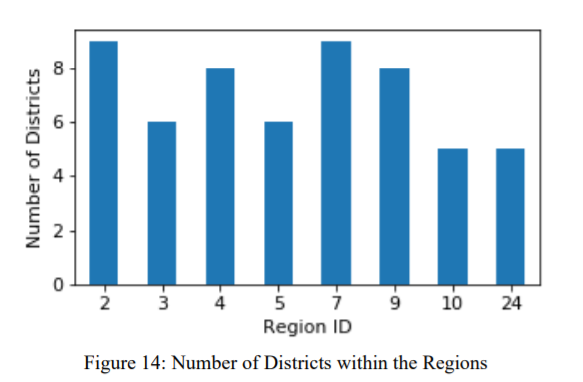

# An Illustrating Example of Full Customer Experience Cycle

We first randomly select a customer order with order_ID ‘___81a6fa818d___’ from the order table. The data below shows the information in ___orders___ table corresponding to the order.

In [11]:
orders[orders['order_ID']=='81a6fa818d'].T

,47253,47254
order_ID,81a6fa818d,81a6fa818d
user_ID,2c511cbd9e,2c511cbd9e
sku_ID,ac61f4e10e,eb3f2d2fd8
order_date,2018-03-02,2018-03-02
order_time,2018-03-02 00:04:44.0,2018-03-02 00:04:44.0
quantity,1,1
type,1,1
promise,1,1
original_unit_price,139.9,139.9
final_unit_price,82.9,82.9


- From the order table, we find that this order is placed by customer ‘2c511cbd9e’ on ‘2018-03-02’ and contains two SKUs with sku_ID ‘ac61f4e10e’ and 'eb3f2d2fd8'.
- Also, we find that the customer took discount from a quantity discount of a total value RMB 100 _[calculated as 100 = 50 (unit discount for sku 'ac61f4e10e') * 1 (quantity for sku 'ac61f4e10e') + 50 (unit discount for sku 'eb3f2d2fd8') * 1 (quantity for sku 'eb3f2d2fd8')]_, a direct discount of a total value RMB 14 and no other discounts.
- The order is shipped from warehouse in district 9 to destination district 27.

Taking a deeper look at the customer with user_ID '2c511cbd9e' from ___users___ table.

In [12]:
users[users['user_ID']=='2c511cbd9e']

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
79944,2c511cbd9e,3,2015-06,0,F,26-35,M,3,1,2


- By looking up the customer ‘2c511cbd9e’ in the ___users___ table, we find that this is a level 3 user with no PLUS membership who has been with JD.com since 2015-06.
- The customer's most common shipping address is in a tier 1 city.
- The customer is estimated to be a married (marital_status = 'M') female customer (gender = 'F') in her 26-35th (age = '26-35') with a Bachelor degree (education = 3) and relatively high purchase power (purchase_power = 2).

Now checking the information available in the ___skus___ table for the related SKUs.

In [13]:
skus[skus['sku_ID'].isin(['ac61f4e10e','eb3f2d2fd8'])]

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
1986,eb3f2d2fd8,1,9b0d3a5fc6,-,-,NaN,NaN
2813,ac61f4e10e,1,9b0d3a5fc6,3.0,80.0,NaN,NaN


- By looking up the two SKUs bought in the ___skus___ table, we find that both of them are 1P skus and of the same brand. However, one item is missing the two provided attributes.
- Both SKUs do not have activate_date and deactivate_date listed, meaning both SKUs are available for purchase during the whole month.

___clicks___ table can also provide further information on how this purchase happened.

In [14]:
clicks[clicks['user_ID']=='2c511cbd9e'].sort_values('request_time')

,sku_ID,user_ID,request_time,channel
744242,81e57cbc50,2c511cbd9e,2018-03-01 23:17:21,app
740110,eb3f2d2fd8,2c511cbd9e,2018-03-01 23:37:23,app
740111,eb3f2d2fd8,2c511cbd9e,2018-03-01 23:37:50,app
470526,3c79df1d80,2c511cbd9e,2018-03-01 23:37:52,app
470527,3c79df1d80,2c511cbd9e,2018-03-01 23:38:06,app
470529,3c79df1d80,2c511cbd9e,2018-03-01 23:38:21,app
613599,1a2362c248,2c511cbd9e,2018-03-01 23:38:36,app
119316,ac61f4e10e,2c511cbd9e,2018-03-01 23:38:43,app
740108,eb3f2d2fd8,2c511cbd9e,2018-03-01 23:38:51,app
119318,ac61f4e10e,2c511cbd9e,2018-03-01 23:39:17,app


- By looking up the same customer in the ___clicks___ table, we find that the customer has been browsing several items before making the purchase decision. 
- The sequence of browsing may suggest the customer was actively comparing between these substitutes as we see many back and forth clicks between several SKUs.

Now we look at how the order is fulfilled. Firstly we can look at the warehouse that is used to fulfill the order from ___orders___ table.

In [15]:
orders[orders['order_ID']=='81a6fa818d'][['sku_ID', 'dc_ori', 'dc_des']]

,sku_ID,dc_ori,dc_des
47253,ac61f4e10e,9,27
47254,eb3f2d2fd8,9,27


- We can see that both SKUs are shipped from a wharehouse in district 9 to district 27 which is the final destination.

The ___delivery___ table can provide more details on the shipment information

In [16]:
delivery[delivery['order_ID']=='81a6fa818d']

,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
10415,81a6fa818d,81a6fa818d,1,2018-03-02 08:00:00,2018-03-02 15:00:00,2018-03-02 16:00:00


- By looking up order '81a6fa818d' in the delivery table, we find that there is only one record, meaning the two purchased items are shipped together in one package. The associated package shipped out from warehouse shortly after the order is placed and arrived at the customer address in the morning of the next day.

The ___inventory___ table would be able to provide more insights on the fulfillment logic.

In [17]:
inventory[(inventory['sku_ID'].isin(['ac61f4e10e','eb3f2d2fd8'])) & \
          (inventory['date']=='2018-03-01') & (inventory['dc_ID']==27)]

,dc_ID,sku_ID,date


In [18]:
inventory[(inventory['sku_ID'].isin(['ac61f4e10e','eb3f2d2fd8'])) & \
          (inventory['date']=='2018-03-01') & (inventory['dc_ID']==9)]

,dc_ID,sku_ID,date
1007,9,ac61f4e10e,2018-03-01
2020,9,eb3f2d2fd8,2018-03-01


- Note that the first statement returns no results, meaning warehouses in district 27 does not have any inventory of any of the SKUs.
- The second statement returns two records, one for each SKU. This suggusts both SKUs are available in the warehouse.
- This explains why the order is fulfilled from a remote warehouse (dc_ori is not the same as dc_des).

The fulfillment logic can be further clarified using the ___network___ table.

In [19]:
network[network['dc_ID'].isin([9, 27])]

,region_ID,dc_ID
38,9,9
41,9,27


- As explained in the data paper, when dc_ID = region_ID, the warehouses in this district are used as "central warehouses" for "back-up fulfillment" when local warehouses are run out of inventory or does not store the SKUs. In this particular case, dc_ID 9 is central warehouse. As we see previous that warehouses in disctrict 27 do not have any inventory for the two ordered SKUs, a warehouse in district 9 is used for the fulfillment of this order.